<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/LS_DS_412_Vector_Representations_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 1, Module 2*

---

# Vector Representations (Prepare)


As we learned yesterday, machines cannot interpret raw text. We need to transform that text into something we/machines can more readily analyze. Yesterday, we did simple counts of counts to summarize the content of Amazon reviews. Today, we'll extend those concepts to talk about vector representations such as Bag of Words (BoW) and word embedding models. We'll use those representations for search, visualization, and prepare for our classification day tomorrow. 

Processing text data to prepare it for machine learning models often means translating the information from documents into a numerical format. Bag-of-Words approaches (sometimes referred to as Frequency-Based word embeddings) accomplish this by "vectorizing" tokenized documents. This is done by representing each document as a row in a DataFrame and creating a column for each unique word in the corpora (group of documents). The presence or lack of a given word in a document is then represented either as a raw count of how many times a given word appears in a document (CountVectorizer) or as that word's TF-IDF score (TfidfVectorizer).

On the python side, we will be focusing on `sklearn` and `spacy` today.  

## Case Study

We're going to pretend we're on the datascience team at the BBC. We want to recommend articles to visitors to on the BBC website based on the article they just read. Our team wants 

**Dataset:**

[D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.](http://mlg.ucd.ie/datasets/bbc.html)
*Please note that the dataset has been sampled down to tech articles only.* 

## Learning Objectives
* <a href="#p1">Part 1</a>: Represent a document as a vector
* <a href="#p2">Part 2</a>: Query Documents by Similarity
* <a href="#p3">Part 3</a>: Apply word embedding models to create document vectors

# Represent a document as a vector (Learn)
<a id="p1"></a>

## Overview

In this section, we are going to create Document Term Matrices (DTM). Each column represents a word. Each row represents a document. The value in each cell can be range of different things. The most traditional: counts of appearances of words, does the word appear at all (binary), and term-frequency inverse-document frequency (TF-IDF). 

**Discussion:** Don't we loose all the context and grammar if we do this? So Why does it work?

## Follow Along

In [ ]:
""" Import Statements """

# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
!python -m spacy download en_core_web_lg


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load("en_core_web_lg")

**Warm Up (_3 Minutes_)**

Extract the tokens from this sentence using Spacy. Text is from [OpenAI](https://openai.com/blog/better-language-models/)

In [ ]:
text = "We created a new dataset which emphasizes diversity of content, by scraping content from the Internet. In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma. This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."

In [ ]:
doc = nlp(text)

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['create', 'new', 'dataset', 'emphasize', 'diversity', 'content', 'scrape', 'content', 'internet', 'order', 'preserve', 'document', 'quality', 'page', 'curate', 'filter', 'human', 'specifically', 'outbound', 'link', 'Reddit', 'receive', '3', 'karma', 'think', 'heuristic', 'indicator', 'user', 'find', 'link', 'interesting', 'educational', 'funny', 'lead', 'high', 'datum', 'quality', 'similar', 'dataset', 'CommonCrawl']


In [ ]:
import os 

def gather_data(filefolder):
    """ Produces List of Documents from a Directory
    
    filefolder (str): a path of .txt files
    
    returns list of strings 
    """
    
    data = []
    
    files = os.listdir(filefolder) # Causes variation across machines
    
    for article in files: 
        
        path = os.path.join(filefolder, article)
                    
        if  path[-3:] == 'txt': # os ~endswith('txt')
            with open(path, 'rb') as f:
                data.append(f.read())
    
    return data

In [ ]:
data = gather_data('/content/data')

In [ ]:
len(data)

401

In [ ]:
data[0]

b'Millions buy MP3 players in US\r\n\r\nOne in 10 adult Americans - equivalent to 22 million people - owns an MP3 player, according to a survey.\r\n\r\nA study by the Pew Internet and American Life Project found that MP3 players are the gadget of choice among affluent young Americans. The survey did not interview teenagers but it is likely that millions of under-18s also have MP3 players. The American love affair with digital music players has been made possible as more and more homes get broadband.\r\n\r\nOf the 22 million Americans who own MP3 players, 59% are men compared to 41% of women. Those on high income - judged to be $75,000 (\xc2\xa339,000) or above - are four times more likely to have players than those earning less than $30, 000 ( \xc2\xa315,000). Broadband access plays a big part in ownership too. Almost a quarter of those with broadband at home have players, compared to 9% of those who have dial-up access. MP3 players are still the gadget of choice for younger adults. Al

In [ ]:
len(data[0])

1842

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["We created a new dataset which emphasizes diversity of content, by scraping content from the Internet."," In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma."," This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."]

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!


In [ ]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [ ]:
dtm

<3x61 sparse matrix of type '<class 'numpy.int64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [ ]:
# Bag of words model
dtm.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2],
        [2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0]])

In [ ]:
print(vect.get_feature_names())

['as', 'at', 'be', 'been', 'by', 'can', 'commoncrawl', 'content', 'created', 'curated', 'data', 'dataset', 'datasets', 'diversity', 'document', 'educational', 'emphasizes', 'filtered', 'for', 'found', 'from', 'funny', 'have', 'heuristic', 'higher', 'humans', 'in', 'indicator', 'interesting', 'internet', 'karma', 'leading', 'least', 'link', 'links', 'new', 'of', 'only', 'or', 'order', 'other', 'outbound', 'pages', 'preserve', 'quality', 'received', 'reddit', 'scraping', 'similar', 'specifically', 'such', 'than', 'the', 'this', 'thought', 'to', 'used', 'users', 'we', 'whether', 'which']


In [ ]:
len(vect.get_feature_names())

61

In [ ]:
text[:25]

['We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.',
 ' In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma.',
 ' This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.']

In [ ]:
# Gives (a, b)  c
# Where a is the row, b is the column, and c is the count
# Only tracks non-zeroes
print(dtm)

  (0, 4)	1
  (0, 7)	2
  (0, 8)	1
  (0, 11)	1
  (0, 13)	1
  (0, 16)	1
  (0, 20)	1
  (0, 29)	1
  (0, 35)	1
  (0, 36)	1
  (0, 47)	1
  (0, 52)	1
  (0, 58)	1
  (0, 60)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 9)	1
  (1, 14)	1
  (1, 17)	1
  (1, 20)	1
  (1, 22)	1
  (1, 25)	1
  (1, 26)	1
  (1, 30)	1
  :	:
  (2, 10)	1
  (2, 12)	1
  (2, 15)	1
  (2, 18)	1
  (2, 19)	1
  (2, 21)	1
  (2, 23)	1
  (2, 24)	1
  (2, 27)	1
  (2, 28)	1
  (2, 31)	1
  (2, 33)	1
  (2, 36)	1
  (2, 38)	1
  (2, 40)	2
  (2, 44)	1
  (2, 48)	1
  (2, 50)	1
  (2, 51)	1
  (2, 52)	1
  (2, 53)	1
  (2, 54)	1
  (2, 55)	1
  (2, 57)	1
  (2, 59)	2


In [ ]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2],
        [2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0]])

In [ ]:
type(dtm)

pandas.core.frame.DataFrame

In [ ]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,as,at,be,been,by,can,commoncrawl,content,created,curated,...,than,the,this,thought,to,used,users,we,whether,which
0,0,0,0,0,1,0,0,2,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,2,0,2,0,2
2,2,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,0,1,0,2,0


**Three Minute Challenge:** 
* Apply CountVectorizer to our BBC Data
* Store results in a dataframe called `dtm`
* Extra Challenge - Try to Customize CountVectorizer with Spacy Processing

In [ ]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words="english", max_features=1000) # max features uses most common tokens

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

# Could also dtm = vect.fit_transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [ ]:
dtm.head()

,000,10,100,11,12,14,15,18,20,200,2003,2004,2005,2006,25,30,3d,3g,40,50,500,60,80,ability,able,access,according,account,accounts,act,action,activity,actually,add,added,address,addresses,advantage,age,ago,...,wanted,wants,warned,warning,wars,watch,watching,way,ways,web,website,websites,week,weeks,went,wi,wide,widely,win,windows,wireless,women,won,word,words,work,worked,working,works,world,worldwide,worm,worth,writing,xbox,xp,yahoo,year,years,york
0,4,1,0,0,0,2,1,1,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,5,4,2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
doc_len = [len(doc) for doc in data]
doc_len

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


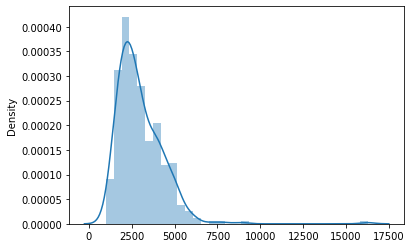

In [ ]:
import seaborn as sns

sns.distplot(doc_len);

### TfidfVectorizer

## Term Frequency - Inverse Document Frequency (TF-IDF)

<center><img src="https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336" width="300"></center>

Term Frequency: Percentage of words in document for each word

Document Frequency: A penalty for the word existing in a high number of documents.

The purpose of TF-IDF is to find what is **unique** to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
vect =TfidfVectorizer(stop_words="english", max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = vect.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(data=dtm.todense(), columns= vect.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,10,100,101,104,10m,11,12,120,13,130,14,149,15,150,16,167,17,17m,18,19,1980s,1982,1983,1985,1990s,1993,1994,1995,1bn,1m,20,200,2000,2001,2002,2003,2004,2005,2006,...,worry,worrying,worse,worst,worth,worthwhile,wouldn,wow,wright,wristwatch,write,writer,writers,writing,written,wrong,wrongful,wrote,wsis,x1,xbox,xenon,xp,xxx,yahoo,yang,year,years,yen,yes,yoda,yoran,york,young,younger,youngsters,youth,zafi,zen,zombies
0,0.120321,0.034637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110761,0.0,0.045233,0.000000,0.0,0.0,0.0,0.0,0.04763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.060811,0.06179,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.021169,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031859,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.033429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.034951,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023799,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.068012,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [ ]:
def tokenize(document):
    """
    Takes a single doc/article and returns a list of tokens for that doc/article
    """
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

text data machines

"text data" "data machines" "text machines"

In [ ]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=10,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,accord,apple,company,computer,consumer,game,high,late,microsoft,mobile,mr,net,new,number,people,say,sony,study,technology,think,time,uk,year,$,1,"1,000",1.3,10,100,"100,000",11,12,12 month,120,13,14,15,150,16,17,...,whilst,wi,wi fi,wide,wide range,widely,win,window,windows,windows xp,winner,wireless,wish,woman,word,work,work,worker,world,world say,world service,worldwide,worm,worry,worth,write,writer,writing,wrong,xbox,xbox 2,xp,yahoo,year,year,year ago,year say,york,young,£
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.062152,0.0,0.0,0.0,0.0,0.0,0.075713,0.0,0.0,0.000000,0.034548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110229,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.053189,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.105206,0.067010
1,0.0,0.000000,0.043466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.018816,0.0,0.038545,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014807,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.041194,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.023129,0.0,0.0,0.051485,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.066907,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.041409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.04966,0.073173,0.063753,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025377,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089435,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.053444,0.0,0.0,0.089435,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.089435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.060782,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.037984,0.0,0.000000,0.072706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.047301


In [ ]:
tfidf.get_feature_names()

In [ ]:
dtm.shape

(401, 1710)

## Challenge

During this module's project assignment, you will transform data science job listings to vector representations for analysis downstream. 

# Query Documents by Similarity (Learn)
<a id="p2"></a>

## Overview

Have you ever considered how a search bar works? You may just think that search bars simply match your input text againist the documents. While there are many different mechanisms for the 'match', one of the most classic is to search by similarity. We will apply n-dimensional distance to measure similarity, and query for input and output. 

## Follow Along

### Cosine Similarity (Brute Force)

In [ ]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix= cosine_similarity(dtm)

In [ ]:
# Turn it into a DataFrame

df = pd.DataFrame(dist_matrix)

In [ ]:
# Each row is a similarity percentage between itself and all other articles
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400
0,1.000000,0.019081,0.020233,0.306865,0.088673,0.045698,0.099250,0.109274,0.034678,0.100899,0.056494,0.031953,0.028669,0.120750,0.037745,0.026361,0.015867,0.145821,0.023927,0.062971,0.044598,0.015607,0.032300,0.045267,0.022562,0.028147,0.050719,0.020938,0.012588,0.044017,0.031406,0.050337,0.066235,0.145420,0.103919,0.091260,0.127076,0.005771,0.082089,0.052320,...,0.026034,0.011712,0.046892,0.097114,0.080209,0.025388,0.142381,0.080233,0.095689,0.158123,0.034678,0.026766,0.058414,0.016615,0.034979,0.302591,0.027055,0.005207,0.019241,0.047999,0.194062,0.058430,0.021308,0.052433,0.285488,0.193012,0.027143,0.020912,0.018247,0.007149,0.061226,0.026649,0.162402,0.074498,0.118660,0.015627,0.034451,0.114178,0.043031,0.075299
1,0.019081,1.000000,0.105942,0.016471,0.036776,0.081417,0.093182,0.048319,0.058999,0.033640,0.051454,0.061553,0.061575,0.129547,0.035036,0.050943,0.069470,0.032965,0.044780,0.086965,0.078057,0.028061,0.104742,0.013688,0.057733,0.044774,0.028453,0.152045,0.019498,0.156514,0.034145,0.047286,0.039374,0.050272,0.043054,0.040539,0.037130,0.089470,0.070168,0.051250,...,0.063531,0.097947,0.126623,0.026386,0.054749,0.041349,0.054001,0.074864,0.113558,0.063550,0.058999,0.085891,0.034506,0.034943,0.169315,0.016242,0.061181,0.105342,0.172261,0.079941,0.036956,0.027303,0.065462,0.073666,0.068471,0.037458,0.038214,0.067724,0.048494,0.087444,0.059015,0.092298,0.070483,0.024879,0.099497,0.065782,0.044175,0.021294,0.331262,0.033906
2,0.020233,0.105942,1.000000,0.043213,0.038144,0.060766,0.033574,0.069034,0.124355,0.036682,0.036487,0.443047,0.013569,0.070275,0.020895,0.019352,0.045504,0.058869,0.041482,0.066098,0.119833,0.017515,0.039496,0.015518,0.133400,0.019251,0.040996,0.238901,0.023189,0.335889,0.028928,0.046188,0.039850,0.036229,0.044326,0.034995,0.015737,0.225925,0.101169,0.026561,...,0.037198,0.369229,0.039894,0.046048,0.077670,0.063938,0.025273,0.028144,0.046817,0.040288,0.124355,0.031358,0.030769,0.025626,0.137119,0.042611,0.156870,0.209891,0.224423,0.025296,0.045015,0.028412,0.091315,0.076652,0.042420,0.034581,0.038600,0.152606,0.100307,0.232830,0.028022,0.083163,0.031994,0.060102,0.075139,0.094437,0.067707,0.012441,0.109304,0.035012
3,0.306865,0.016471,0.043213,1.000000,0.041135,0.023005,0.152585,0.293241,0.035201,0.069605,0.032198,0.035333,0.020698,0.090355,0.023990,0.013712,0.063685,0.110644,0.096537,0.029584,0.067232,0.055047,0.088227,0.101597,0.043921,0.016834,0.074765,0.037133,0.017655,0.027656,0.025278,0.079927,0.101737,0.275125,0.015706,0.091252,0.113404,0.118616,0.133331,0.029054,...,0.032335,0.053083,0.048267,0.012512,0.118736,0.041776,0.110239,0.037762,0.081140,0.255172,0.035201,0.036010,0.096415,0.006656,0.070467,0.998094,0.052480,0.068235,0.009200,0.036149,0.141249,0.058734,0.056303,0.042888,0.315236,0.155555,0.032349,0.049150,0.005121,0.038399,0.084741,0.008434,0.210773,0.116514,0.070583,0.013519,0.057233,0.438308,0.048327,0.241189
4,0.088673,0.036776,0.038144,0.041135,1.000000,0.053506,0.065306,0.039911,0.038929,0.090580,0.046855,0.078775,0.037884,0.033199,0.047268,0.091733,0.045904,0.057823,0.055471,0.097167,0.062200,0.082059,0.042679,0.074685,0.049669,0.080639,0.077499,0.030109,0.056519,0.049766,0.042464,0.040441,0.126671,0.196035,0.084728,0.203081,0.036818,0.032118,0.066540,0.065913,...,0.036517,0.048079,0.038987,0.077873,0.056668,0.030394,0.058615,0.127539,0.099273,0.093218,0.038929,0.044077,0.049930,0.033330,0.088624,0.040562,0.067432,0.028277,0.028378,0.061179,0.175894,0.034274,0.062181,0.048611,0.110362,0.039468,0.020314,0.036301,0.021960,0.026772,0.034785,0.125758,0.076544,0.071766,0.137968,0.058693,0.030445,0.045750,0.062908,0.122753
5,0.045698,0.081417,0.060766,0.023005,0.053506,1.000000,0.136437,0.056947,0.072401,0.041658,0.0

30% similarity between articles 0 and 3

In [ ]:
df.shape

(401, 401)

In [ ]:
data[0]

b'Millions buy MP3 players in US\r\n\r\nOne in 10 adult Americans - equivalent to 22 million people - owns an MP3 player, according to a survey.\r\n\r\nA study by the Pew Internet and American Life Project found that MP3 players are the gadget of choice among affluent young Americans. The survey did not interview teenagers but it is likely that millions of under-18s also have MP3 players. The American love affair with digital music players has been made possible as more and more homes get broadband.\r\n\r\nOf the 22 million Americans who own MP3 players, 59% are men compared to 41% of women. Those on high income - judged to be $75,000 (\xc2\xa339,000) or above - are four times more likely to have players than those earning less than $30, 000 ( \xc2\xa315,000). Broadband access plays a big part in ownership too. Almost a quarter of those with broadband at home have players, compared to 9% of those who have dial-up access. MP3 players are still the gadget of choice for younger adults. Al

In [ ]:
data[3]

b'Gadget show heralds MP3 season\r\n\r\nPartners of those who love their hi-tech gear may want to get their presents in early as experts predict a gadget shortage this Christmas.\r\n\r\nWith Apple\'s iPod topping wish lists again, there may not be enough iPod minis to go round, predicts Oliver Irish, editor of gadget magazine Stuff. "The iPod mini is likely to be this year\'s Tracey Island," said Mr Irish. Stuff has compiled a list of the top 10 gadgets for 2004 and the iPod is at number one.\r\n\r\nFor anyone bewildered by the choice of gadgets on the market, Stuff and What Hi-Fi? are hosting a best-of gadget show in London this weekend. Star of the show will be Sony\'s Qrio Robot, an all-singing, all-dancing, football-playing man-machine who can even hold intelligent conversations.\r\n\r\nBut he is not for sale and Sony has no commercial plans for the robot. "He will greet visitors and is flying in from Japan. He probably has his own airplane seat, that is how highly Sony prize him,"

In [ ]:
# Rank similarity scores for first article. Top 5
df[df[0] < 1.0][0].sort_values(ascending=False)[:5]

3      0.306865
376    0.302591
118    0.285488
385    0.285488
244    0.260332
Name: 0, dtype: float64

In [ ]:
# Our Similarity Matrix is ? size 
df.shape

(401, 401)

In [ ]:
data[0][:100]

b'Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this'

In [ ]:
# Each row is the similarity of one document to all other documents (including itself)
df[0][:5]

0    1.000000
1    0.075861
2    0.042398
3    0.011078
4    0.055294
Name: 0, dtype: float64

In [ ]:
# Grab the row
df[df[0] < 1][0].sort_values(ascending=False)[:5]

297    0.296352
300    0.290672
92     0.266468
381    0.242043
63     0.236623
Name: 0, dtype: float64

In [ ]:
print(data[0][:150])

b"Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone call was m"


In [ ]:
print(data[297][:150])

b"'Friends fear' with lost mobiles\n\nPeople are becoming so dependent on their mobile phones that one in three are concerned that losing their phone woul"


### NearestNeighbor (K-NN) 

To address the computational inefficiencies of the brute-force approach, a variety of tree-based data structures have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point  is very distant from point , and point  is very close to point , then we know that points  and  are very distant, without having to explicitly calculate their distance. In this way, the computational cost of a nearest neighbors search can be reduced to  or better. This is a significant improvement over brute-force for large data.

To address the inefficiencies of KD Trees in higher dimensions, the ball tree data structure was developed. Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly than that of the KD tree, but results in a data structure which can be very efficient on highly structured data, even in very high dimensions.

A ball tree recursively divides the data into nodes defined by a centroid  and radius , such that each point in the node lies within the hyper-sphere defined by  and . The number of candidate points for a neighbor search is reduced through use of the triangle inequality:

With this setup, a single distance calculation between a test point and the centroid is sufficient to determine a lower and upper bound on the distance to all points within the node. Because of the spherical geometry of the ball tree nodes, it can out-perform a KD-tree in high dimensions, though the actual performance is highly dependent on the structure of the training data. In scikit-learn, ball-tree-based neighbors searches are specified using the keyword algorithm = 'ball_tree', and are computed using the class sklearn.neighbors.BallTree. Alternatively, the user can work with the BallTree class directly.

In [ ]:
dtm.head()

,accord,apple,company,computer,consumer,game,high,late,microsoft,mobile,mr,net,new,number,people,say,sony,study,technology,think,time,uk,year,$,1,"1,000",1.3,10,100,"100,000",11,12,12 month,120,13,14,15,150,16,17,...,whilst,wi,wi fi,wide,wide range,widely,win,window,windows,windows xp,winner,wireless,wish,woman,word,work,work,worker,world,world say,world service,worldwide,worm,worry,worth,write,writer,writing,wrong,xbox,xbox 2,xp,yahoo,year,year,year ago,year say,york,young,£
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.062152,0.0,0.0,0.0,0.0,0.0,0.075713,0.0,0.0,0.000000,0.034548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110229,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.053189,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.105206,0.067010
1,0.0,0.000000,0.043466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.018816,0.0,0.038545,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014807,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.041194,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.023129,0.0,0.0,0.051485,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.066907,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.041409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.04966,0.073173,0.063753,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025377,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089435,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.053444,0.0,0.0,0.089435,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.089435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.060782,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.037984,0.0,0.000000,0.072706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.047301


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree') # 5 nearest
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
# Look at random article 265
doc_vector = dtm.iloc[265].values
doc_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Query using kneighbors
doc_j = [doc_vector]

In [ ]:
doc_j

[array([0., 0., 0., ..., 0., 0., 0.])]

In [ ]:
n_dist, n_indices = nn.kneighbors(doc_j)

In [ ]:
# Shows distances and corresponding articles with indices
n_dist

array([[0.        , 0.        , 0.99676403, 0.99676403, 1.02428168]])

In [ ]:
n_indices

array([[143, 265,  49, 306, 128]])

In [ ]:
data[265]

b'Microsoft makes anti-piracy move\r\n\r\nMicrosoft says it is clamping down on people running pirated versions of its Windows operating system by restricting their access to security features.\r\n\r\nThe Windows Genuine Advantage scheme means people will have to prove their software is genuine from mid-2005. It will still allow those with unauthorised copies to get some crucial security fixes via automatic updates, but their options would be "limited". Microsoft releases regular security updates to its software to protect PCs. Either PCs detect updates automatically or users manually download fixes through Microsoft\'s site. Those running pirated Windows programs would not have access to other downloads and "add-ons" that the software giant offers.\r\n\r\nPeople who try to manually download security patches will have to let Microsoft run an automated checking procedure on their computer or give an identification number.\r\n\r\nMicrosoft\'s regular patches which it releases for newly-f

In [ ]:
data[143]

b'Microsoft makes anti-piracy move\r\n\r\nMicrosoft says it is clamping down on people running pirated versions of its Windows operating system by restricting their access to security features.\r\n\r\nThe Windows Genuine Advantage scheme means people will have to prove their software is genuine from mid-2005. It will still allow those with unauthorised copies to get some crucial security fixes via automatic updates, but their options would be "limited". Microsoft releases regular security updates to its software to protect PCs. Either PCs detect updates automatically or users manually download fixes through Microsoft\'s site. Those running pirated Windows programs would not have access to other downloads and "add-ons" that the software giant offers.\r\n\r\nPeople who try to manually download security patches will have to let Microsoft run an automated checking procedure on their computer or give an identification number.\r\n\r\nMicrosoft\'s regular patches which it releases for newly-f

In [ ]:
data[49]

b'Microsoft releases bumper patches\r\n\r\nMicrosoft has warned PC users to update their systems with the latest security fixes for flaws in Windows programs.\r\n\r\nIn its monthly security bulletin, it flagged up eight "critical" security holes which could leave PCs open to attack if left unpatched. The number of holes considered "critical" is more than usual. They affect Windows programs, including Internet Explorer (IE), media player and instant messaging. Four other important fixes were also released. These were considered to be less critical, however. If not updated, either automatically or manually, PC users running the programs could be vulnerable to viruses or other malicious attacks designed to exploit the holes. Many of the flaws could be used by virus writers to take over computers remotely, install programs, change, and delete or see data.\r\n\r\nOne of the critical patches Microsoft has made available is an important one that fixes some IE flaws. Stephen Toulouse, a Micros

NOTE THAT NO LEARNING IS HAPPENING. Instance based?

In [ ]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 0.        , 1.18629524, 1.19107356, 1.21122457]]),
 array([[  0,  62, 297, 300,  92]]))

In [ ]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 0.        , 0.84251433, 0.98845232, 1.03646417]]),
 array([[256,  12, 121, 155, 351]]))

In [ ]:
data[256][:200]

b"Sony PSP console hits US in March\n\nUS gamers will be able to buy Sony's PlayStation Portable from 24 March, but there is no news of a Europe debut.\n\nThe handheld console will go on sale for $250 (\xc2\xa313"

In [ ]:
data[121][:200]

b"Sony PSP handheld console hits US\n\nThe latest handheld gaming gadget, Sony's PlayStation Portable, goes on sale in the US on Thursday.\n\nThe entertainment device, which also stores images, music and vi"

In [ ]:
rndm_tech_article = [ """
Final Fantasy VII Remake and Marvel’s Avengers, two of this year’s major releases, have both been postponed. Square Enix, the publisher behind the titles, announced the news Tuesday morning.

Avengers is being pushed back four months, with its new release date set for September 4. The arrival of Final Fantasy VII Remake has been bumped by one month, moving from March 3 to April 10.

Delays for massive blockbuster games are common around this time of year. With the industry preparing for big, anticipated releases slated for spring, summer and the holidays, the news from Square Enix isn’t all that surprising. Early builds for Marvel’s Avengers received a mixed reception at E3 2019 and subsequent, similar events. Final Fantasy VII fans will likely have a critical eye when revisiting the classic, setting a high bar for developers to clear.

Final Fantasy VII Remake is among The Washington Post's most anticipated games of 2020.

“We are making this tough decision in order to give ourselves a few extra weeks to apply final polish to the game and to deliver you with the best possible experience,” wrote Final Fantasy VII Remake producer Yoshinori Kitase in a statement. “I, on behalf of the whole team, want to apologize to everyone, as I know this means waiting for the game just a little bit longer.”

Marvel’s Avengers’s developer Crystal Dynamics released a similar statement, with studio co-heads Scot Amos and Ron Rosenberg citing “fine tuning and polishing” as the reason for the delay. “We will spend this additional development time focusing on fine tuning and polishing the game to the high standards our fans expect and deserve.”

"""]


In [ ]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(rndm_tech_article)

In [ ]:
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 97 stored elements in Compressed Sparse Row format>

In [ ]:
nn.kneighbors(new.todense())

(array([[1.31649449, 1.32114904, 1.32573222, 1.32726235, 1.33311102]]),
 array([[140, 241, 322,  55, 368]]))

In [ ]:
# Inspect Most relevant result
data[140]

b'Losing yourself in online gaming\n\nOnline role playing games are time-consuming, but enthralling flights from reality. But are some people taking their fantasy lives too seriously?\n\nWhen video game World of Warcraft hit the shops in Europe last week fans wrote in to the BBC website to express their delight - and to offer a warning. "An addiction to a game like this is far more costly in time than any substance could impair - keep track of time," wrote Travis Anderson, in Texas. Some of the comments were humorous: "This game is so good I\'m not going to get it, there\'s no way I could limit the hours I\'d spend playing it," wrote Charles MacIntyre, from England.\n\nBut some struck a more worrying tone about the Massively Multiplayer Online Role Playing Game (MMORPG): "\'You need to get out more\' could be the motto of any MMORPG. Shame they are getting more popular, as you know this problem is just going to mushroom," wrote Stuart Stanton-Davies, in Huddersfield. Scare-mongering ar

## Challenge

In the module project assignment, you will apply one of these search techniques to retrieve documents related to a query document. 

# Apply word embedding models to create document vectors (Learn)
<a id="p3"></a>

## Overview
### BoW discards textual context

One of the limitations of Bag-of-Words approaches is that any information about the textual context surrounding that word is lost. This also means that with bag-of-words approaches often the only tools that we have for identifying words with similar usage or meaning and subsequently consolidating them into a single vector is through the processes of stemming and lemmatization which tend to be quite limited at consolidating words unless the two words are very close in their spelling or in their root parts-of-speech.

### Embedding approaches preserve more textual context
Word2Vec is an increasingly popular word embedding technique. Like Bag-of-words it learns a real-value vector representation for a predefined fixed-size vocabulary that is generated from a corpus of text. However, in contrast to BoW, Word2Vec approaches are much more capable of accounting for textual context, and are better at discovering words with similar meanings or usages (semantic or syntactic similarity).

### Word2Vec Intuition
### The Distribution Hypothesis

In order to understand how Word2Vec preserves textual context we have to understand what's called the Distribution Hypothesis (Reference: Distribution Hypothesis Theory  -https://en.wikipedia.org/wiki/Distributional_semantics. The Distribution Hypothesis operates under the assumption that words that have similar contexts will have similar meanings. Practically speaking, this means that if two words are found to have similar words both to the right and to the left of them throughout the corpora then those words have the same context and are assumed to have the same meaning. 

> "You shall know a word by the company it keeps" - John Firth

This means that we let the usage of a word define its meaning and its "similarity" to other words. In the following example, which words would you say have a similar meaning? 

**Sentence 1**: Traffic was light today

**Sentence 2**: Traffic was heavy yesterday

**Sentence 3**: Prediction is that traffic will be smooth-flowing tomorrow since it is a national holiday

What words in the above sentences seem to have a similar meaning if all you knew about them was the context in which they appeared above? 

Lets take a look at how this might work in action, the following example is simplified, but will give you an idea of the intuition for how this works.

#### Corpora:

1) "It was the sunniest of days."

2) "It was the raniest of days."

#### Vocabulary:

{"it": 1, "was": 2, "the": 3, "of": 4, "days": 5, "sunniest": 6, "raniest": 7}

### Vectorization

|       doc   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | it_the | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|--------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0      | 0           | 0            | 0      |
| was      | 0         | 1      | 0            | 0      | 0             | 0     | 0        | 1      | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 0      | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0      | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0      | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |

Each column vector represents the word's context -in this case defined by the words to the left and right of the center word. How far we look to the left and right of a given word is referred to as our "window of context." Each row vector represents the the different usages of a given word. Word2Vec can consider a larger context than only words that are immediately to the left and right of a given word, but we're going to keep our window of context small for this example. What's most important is that this vectorization has translated our documents from a text representation to a numeric one in a way that preserves information about the underlying context. 

We can see that words that have a similar context will have similar row-vector representations, but before looking that more in-depth, lets simplify our vectorization slightly. You'll notice that we're repeating the column-vector "it_the" twice. Lets combine those into a single vector by adding them element-wise. 

|       *   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0           | 0            | 0      |
| was      | 0         | 2      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |

Now, can you spot which words have a similar row-vector representation? Hint: Look for values that are repeated in a given column. Each column represents the context that word was found in. If there are multiple words that share a context then those words are understood to have a closer meaning with each other than with other words in the text.

Lets look specifically at the words sunniest and raniest. You'll notice that these two words have exactly the same 10-dimensional vector representation. Based on this very small corpora of text we would conclude that these two words have the same meaning because they share the same usage. Is this a good assumption? Well, they are both referring to the weather outside so that's better than nothing. You could imagine that as our corpora grows larger we will be exposed a greater number of contexts and the Distribution Hypothesis assumption will improve. 

### Word2Vec Variants

#### Skip-Gram

The Skip-Gram method predicts the neighbors’ of a word given a center word. In the skip-gram model, we take a center word and a window of context (neighbors) words to train the model and then predict context words out to some window size for each center word.

This notion of “context” or “neighboring” words is best described by considering a center word and a window of words around it. 

For example, if we consider the sentence **“The speedy Porsche drove past the elegant Rolls-Royce”** and a window size of 2, we’d have the following pairs for the skip-gram model:

**Text:**
**The**	speedy	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (the, speedy), (the, Porsche)

**Text:**
The	**speedy**	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (speedy, the), (speedy, Porsche), (speedy, drove)

**Text:**
The	speedy	**Porsche**	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (Porsche, the), (Porsche, speedy), (Porsche, drove), (Porsche, past)

**Text:**
The	speedy	Porsche	**drove**	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (drove, speedy), (drove, Porsche), (drove, past), (drove, the)

The **Skip-gram model** is going to output a probability distribution i.e. the probability of a word appearing in context given a center word and we are going to select the vector representation that maximizes the probability.

With CountVectorizer and TF-IDF the best we could do for context was to look at common bi-grams and tri-grams (n-grams). Well, skip-grams go far beyond that and give our model much stronger contextual information.

![alt text](https://www.dropbox.com/s/c7mwy6dk9k99bgh/Image%202%20-%20SkipGrams.jpg?raw=1)

## Continuous Bag of Words

This model takes thes opposite approach from the skip-gram model in that it tries to predict a center word based on the neighboring words. In the case of the CBOW model, we input the context words within the window (such as “the”, “Proshe”, “drove”) and aim to predict the target or center word “speedy” (the input to the prediction pipeline is reversed as compared to the SkipGram model).

A graphical depiction of the input to output prediction pipeline for both variants of the Word2vec model is attached. The graphical depiction will help crystallize the difference between SkipGrams and Continuous Bag of Words.

![alt text](https://www.dropbox.com/s/k3ddmbtd52wq2li/Image%203%20-%20CBOW%20Model.jpg?raw=1)

## Notable Differences between Word Embedding methods:

1) W2V focuses less document topic-modeling. You'll notice that the vectorizations don't really retain much information about the original document that the information came from. At least not in our examples.

2) W2V can result in really large and complex vectorizations. In fact, you need Deep Neural Networks to train your Word2Vec models from scratch, but we can use helpful pretrained embeddings (thank you Google) to do really cool things!

*^ All that noise....AND Spacy has pretrained a Word2Vec model you can just use? WTF JC?*

Let's take a look at how to do it. 

In [ ]:
# Process a text
nlp = spacy.load('en_core_web_lg')

doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc.vector
print(bananas_vector)

[ 2.07984239e-01 -2.60890484e-01 -1.15457252e-01 -1.96443751e-01
 -2.83249468e-03  3.55849974e-02 -2.05170006e-01 -2.27374747e-01
  8.56052488e-02  1.36894751e+00 -5.74124977e-02  8.06210041e-02
  2.37275064e-02  1.17454052e-01 -6.53099641e-03 -1.24400005e-01
  1.99086756e-01  6.37722552e-01  1.52916998e-01 -2.33504996e-01
 -2.40909994e-01 -7.11500049e-02 -9.10753161e-02  7.16734976e-02
  1.16262749e-01 -3.91372502e-01  1.13048747e-01 -2.11327493e-01
  1.09019078e-01 -2.44885415e-01  3.00577488e-02  4.77855802e-02
  7.37800002e-02  2.57142037e-01  2.62586236e-01 -1.66897491e-01
  1.87596500e-01 -1.23680010e-02 -1.76299751e-01  1.11685000e-01
  1.82024967e-02  9.86500084e-03 -3.58770013e-01 -2.23265499e-01
 -4.37720008e-02  3.63999486e-01  7.42954984e-02  1.21225506e-01
  1.37013003e-01 -5.50666526e-02  2.66017504e-02  8.87180045e-02
 -1.14092499e-01 -2.02865750e-01  3.63092512e-01 -3.08394760e-01
  1.13859497e-01  3.13650146e-02  2.62076259e-01  1.90399922e-02
  7.24634901e-02  2.79004

In [ ]:
len(bananas_vector)

300

In [ ]:
bananas_vector.shape

(300,)

In [ ]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("I hate dogs.")


In [ ]:
# Calculate similarity between both docs
doc1.similarity(doc2)

0.5842364134093874

In [ ]:
doc2 = nlp("I hate walking a dog on warm days in the park...")
doc1.similarity(doc2)

0.8563711332175615

In [ ]:
doc1.vector

array([ 1.92744672e-01,  2.46878192e-01,  6.58435002e-02,  8.51958394e-02,
        5.43755330e-02, -8.68267287e-03, -2.58049313e-02, -1.35098726e-01,
        1.79639999e-02,  2.41096663e+00, -1.48898825e-01, -2.03088835e-01,
       -9.89535227e-02, -1.03275120e-01, -1.78346500e-01, -9.25900713e-02,
       -1.00365840e-01,  1.13418341e+00,  1.02856681e-02, -1.80712819e-01,
       -1.41739175e-01, -1.69359490e-01, -2.21541658e-01,  1.31741673e-01,
       -6.30383343e-02,  1.39729967e-02, -1.04047127e-01,  3.33440006e-02,
        1.54353335e-01, -5.61148413e-02, -7.93390349e-02, -9.00483355e-02,
       -3.21440510e-02, -1.21463664e-01,  1.72498509e-01, -2.07116697e-02,
        2.14606687e-01, -4.91766632e-02,  9.13834944e-02, -1.53652832e-01,
        1.37981670e-02,  1.49225995e-01,  1.03531994e-01, -7.70686567e-02,
        1.73393860e-01,  2.47923151e-01, -2.40127400e-01,  7.11250305e-03,
       -3.17283976e-03, -7.78269991e-02, -1.06969662e-01,  1.60523340e-01,
        8.40356722e-02,  

In [ ]:
doc1.vector.shape

(300,)

In [ ]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish' , 'lion', 'tiger', 'lynx', 'potato']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 5.15021219, -1.02589405],
       [ 4.68847306, -0.32752874],
       [ 4.18183622, -1.25490821],
       [ 2.3045236 , -0.62841121],
       [-1.6975279 , -1.26790577],
       [-2.19008419,  0.0674359 ],
       [-2.41987038, -1.23168885],
       [-2.4303113 , -2.84156896],
       [-1.9405539 , -2.55571106],
       [-2.16312982, -2.6337209 ],
       [ 0.66759362,  0.42236702],
       [-0.36687779,  4.15296085],
       [-1.89448123,  1.39241361],
       [-1.44081158,  2.52885279],
       [-0.87134078,  2.86535252],
       [ 0.42235018,  2.33795505]])

In [ ]:
len(words)

16

In [ ]:
word_vecs_2d.shape

(16, 2)

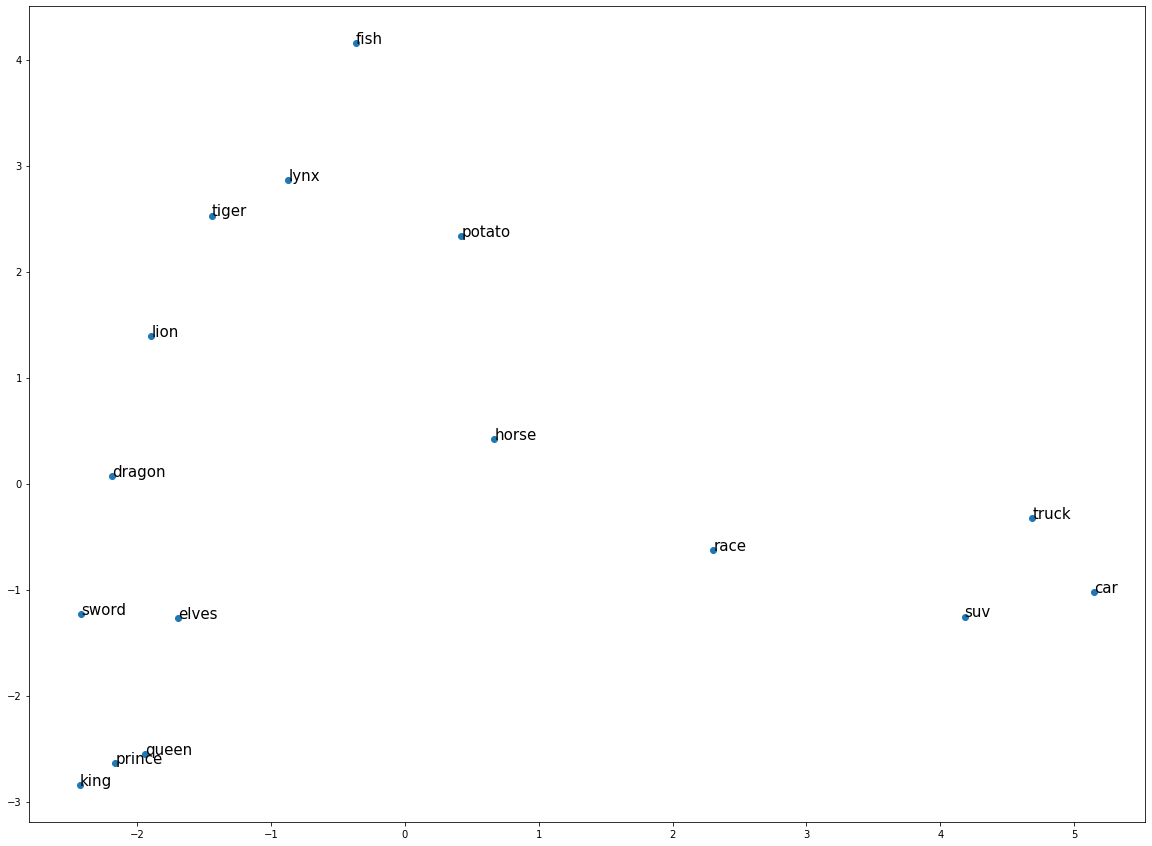

In [ ]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

## Follow Along
### Extract Document Vectors

Let's see how much the quality of our query will work when we try a new embedding model.

Steps:
* Extract Vectors from Each Document
* Search using KNN


In [ ]:
X = [nlp(str(d)).vector for d in data]

In [ ]:
pd.DataFrame(X).shape

(401, 300)

## Challenge

You will extract word embeddings from documents using Spacy's pre-trained model in the upcoming module project. 

# Review
For your module project assignment you will create vector representations of indeed.com Data Science job listings. You will then estimate a similarity model to perform searches for job descriptions. Get started with your [module project here](./LS_DS_412_Vector_Representations_Assignment.ipynb)

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf